In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans

import acquire



<h3>Acquire</h3>

In [2]:
# acquire iris data 
iris_o = acquire.get_iris_data()

Let me get that for you...


In [3]:
iris_o

,Unnamed: 0,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,1,2,4.9,3.0,1.4,0.2,setosa
2,2,1,3,4.7,3.2,1.3,0.2,setosa
3,3,1,4,4.6,3.1,1.5,0.2,setosa
4,4,1,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...,...,...
145,145,3,146,6.7,3.0,5.2,2.3,virginica
146,146,3,147,6.3,2.5,5.0,1.9,virginica
147,147,3,148,6.5,3.0,5.2,2.0,virginica
148,148,3,149,6.2,3.4,5.4,2.3,virginica


<h3>Prepare</h3>

In [4]:
# create a new iris dataframe with out Unnamed: 0, species_id, and species_name columns
iris = iris_o.drop(columns=['Unnamed: 0', 'species_id', 'species_name'])
iris

,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


Clustering with the Iris Dataset

1. Using this lesson as a guide, perform clustering on the iris dataset.

    - Choose features other than the ones used in the lesson.

    - Visualize the results of your clustering.

    - Use the elbow method to visually select a good value for k.

    - Repeat the clustering, this time with 3 different features.

In [5]:
# X is the features you want to use to cluster
X = iris[['petal_width', 'sepal_width']]

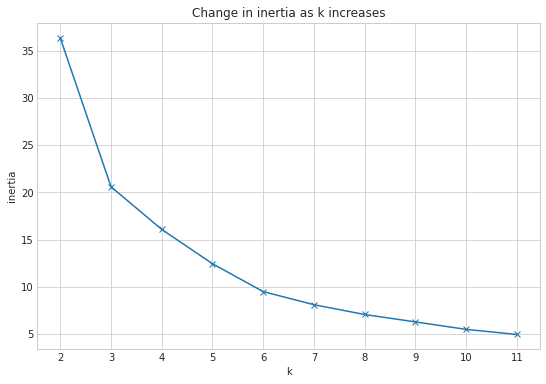

In [6]:
# Check the inertia of the KMeans model
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [7]:
# KMeans with k=3
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [8]:
# Add a column to the iris dataframe called cluster
iris['cluster'] = kmeans.predict(X)

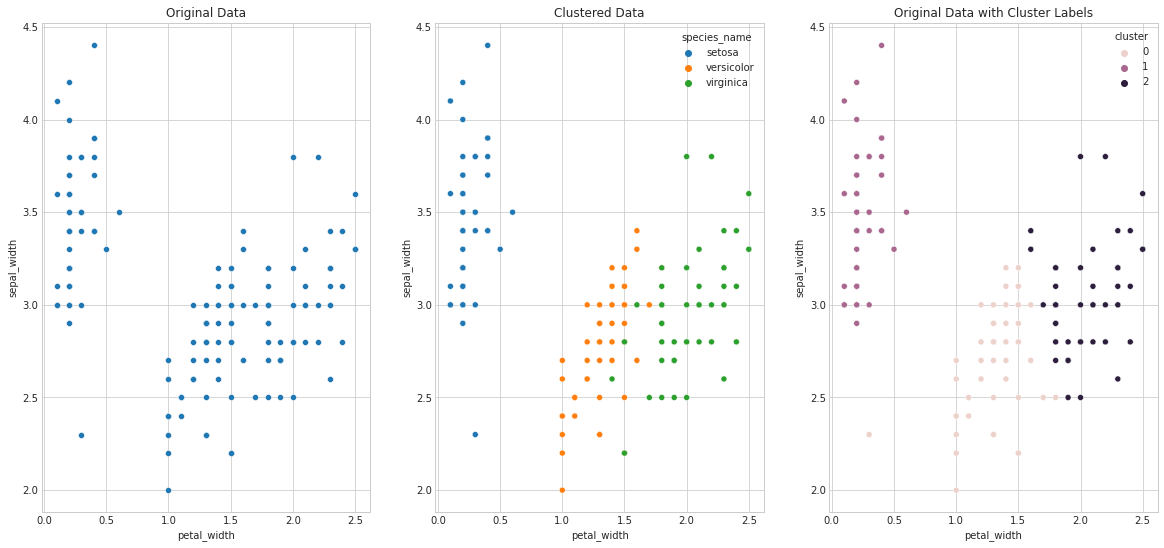

In [9]:
# create three subplots with original data, actual species, and cluster assignments
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(20, 9))
    plt.subplot(1, 3, 1)
    sns.scatterplot(x='petal_width', y='sepal_width', data=iris)
    plt.title('Original Data')
    plt.subplot(1, 3, 2)
    sns.scatterplot(x='petal_width', y='sepal_width', hue='species_name', data=iris_o)
    plt.title('Clustered Data')
    plt.subplot(1, 3, 3)
    sns.scatterplot(x='petal_width', y='sepal_width', hue='cluster', data=iris)
    plt.title('Original Data with Cluster Labels')

In [10]:
kmeans.cluster_centers_ # the cluster centers

array([[1.30943396, 2.70754717],
       [0.24489796, 3.45102041],
       [2.05208333, 3.04166667]])

In [11]:
# create a dataframe of the cluster centers
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,petal_width,sepal_width
0,1.309434,2.707547
1,0.244898,3.451020
2,2.052083,3.041667


In [12]:
# create a dataframe of the cluster centers
iris.groupby('cluster')['petal_width', 'sepal_width'].mean()

,petal_width,sepal_width
cluster,,
0,1.309434,2.707547
1,0.244898,3.451020
2,2.052083,3.041667


In [13]:
plt.figure(figsize=(14, 9))

for cluster, subset in iris.groupby('cluster'):
    plt.scatter(subset.sepal_width, subset.petal_width, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_width', x='sepal_width', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title('Visualizing Cluster Centers')

In [14]:
# explore different values of k=2
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
iris['cluster'] = kmeans.predict(X)

sns.relplot(data=iris, x='petal_length', y='petal_width', hue='cluster')

In [15]:
# # Explore different values of k=5
# kmeans = KMeans(n_clusters=5).fit(X)
# iris['cluster'] = kmeans.predict(X)
# iris.cluster = 'cluster_' + (iris.cluster + 1).astype('str')
# sns.relplot(data=iris, x='petal_length', y='petal_width', hue='cluster')

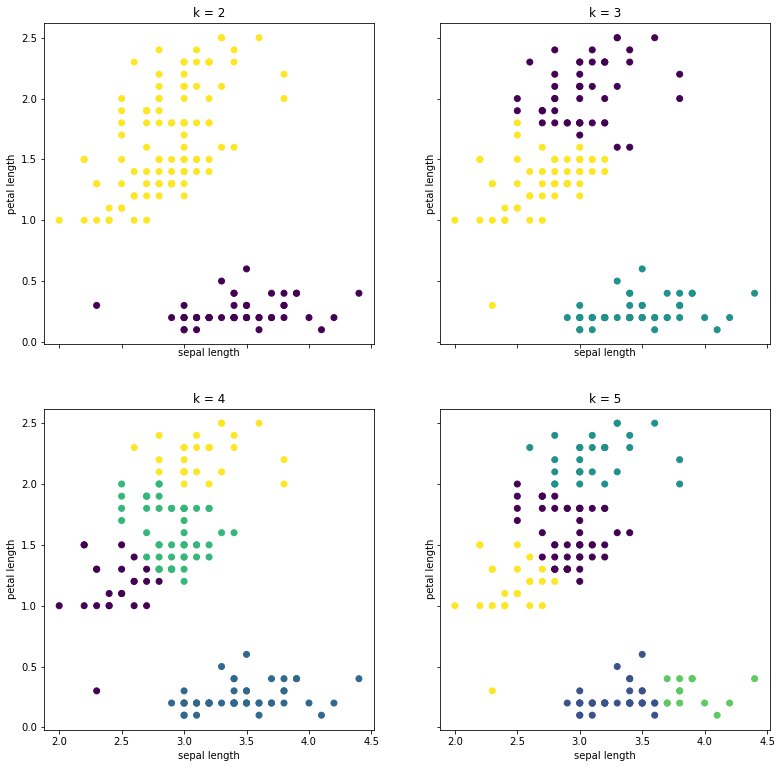

In [16]:
# visualize the clusters with differnet k values
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.sepal_width, X.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='petal length')

<h3>Created Functions for automation</h3>

In [40]:
def inertia(df, feature1, feature2, r1, r2):
    cols = [feature1, feature2]
    X = df[cols]
    
    inertias = {}
    
    for k in range(r1, r2):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        inertias[k] = kmeans.inertia_
    
    pd.Series(inertias).plot(xlabel='k', ylabel='Inertia', figsize=(9, 7))
    plt.grid()
    return


In [18]:
def cluster(df, feature1, feature2, k):
    X = df[[feature1, feature2]]

    kmeans = KMeans(n_clusters=k).fit(X)
    
    df['cluster'] = kmeans.predict(X)

    centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
    
    plt.figure(figsize=(14, 9))
    
    for cluster, subset in df.groupby('cluster'):
        plt.scatter(subset[feature2], subset[feature1], label='cluster ' + str(cluster), alpha=.6)
    
    centroids.plot.scatter(y=feature1, x=feature2, c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')
    
    plt.legend()
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title('Visualizing Cluster Centers')

    return

In [19]:
# scale the data min-max
import sklearn.preprocessing as skl_pp

def scale_minmax(df):
    scaler = skl_pp.MinMaxScaler()
    df_scaled = scaler.fit_transform(df)
    df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
    return df_scaled

In [20]:
scaled_iris = scale_minmax(iris)

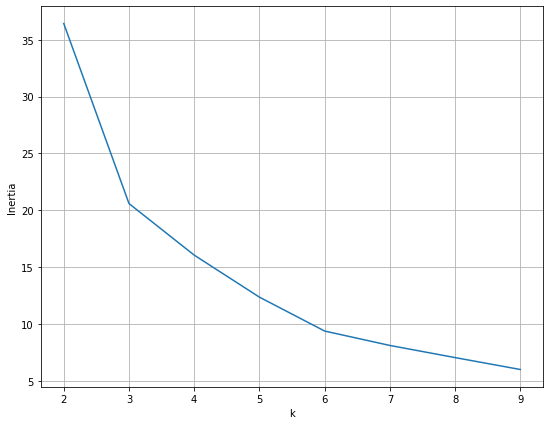

In [22]:
inertia(iris_o, 'sepal_width', 'petal_width', 2, 10)

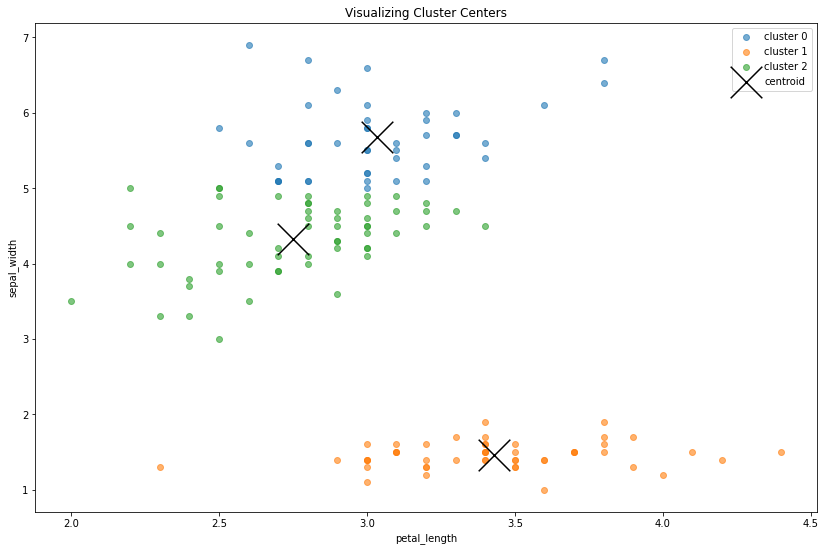

In [23]:
cluster(iris_o, 'petal_length', 'sepal_width', 3)

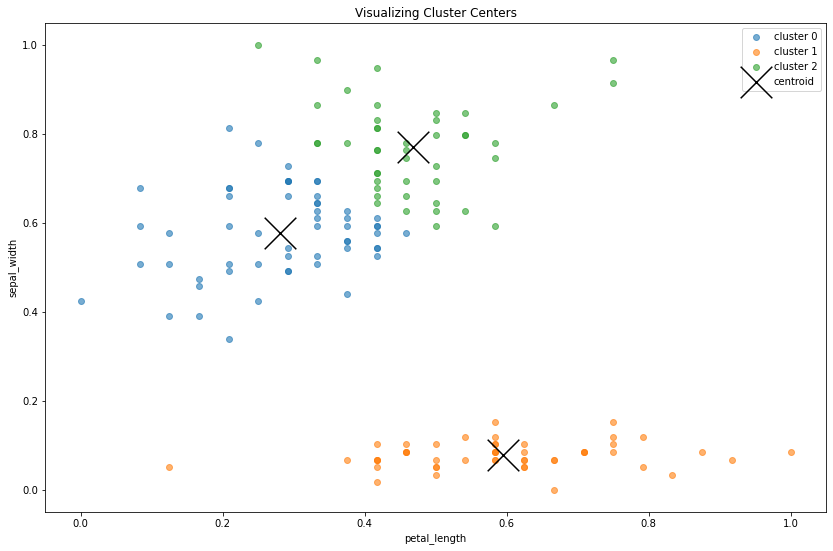

In [24]:
cluster(scaled_iris, 'petal_length', 'sepal_width', 3)

2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [25]:
# acquire mall dataset
mall_o = acquire.get_mall_data()
mall_o

Let me get that for you...


,Unnamed: 0,customer_id,gender,age,annual_income,spending_score
0,0,1,Male,19,15,39
1,1,2,Male,21,15,81
2,2,3,Female,20,16,6
3,3,4,Female,23,16,77
4,4,5,Female,31,17,40
...,...,...,...,...,...,...
195,195,196,Female,35,120,79
196,196,197,Female,45,126,28
197,197,198,Male,32,126,74
198,198,199,Male,32,137,18


In [26]:
mall_o.dtypes

Unnamed: 0         int64
customer_id        int64
gender            object
age                int64
annual_income      int64
spending_score     int64
dtype: object

In [27]:
mall = pd.get_dummies(mall_o, 'gender')

In [29]:
# drop gender_Female and Unnamed: 0
mall = mall.drop(['gender_Female', 'Unnamed: 0'], axis=1)


In [30]:
mall

,customer_id,age,annual_income,spending_score,gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


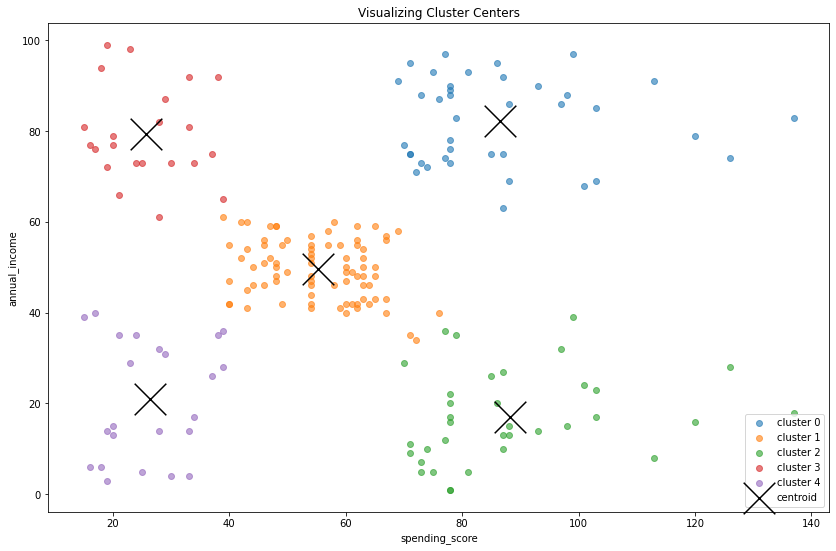

In [35]:
cluster(mall, 'spending_score', 'annual_income', 5)

3. How does scaling impact the results of clustering?

In [32]:
scaled_mall = scale_minmax(mall)

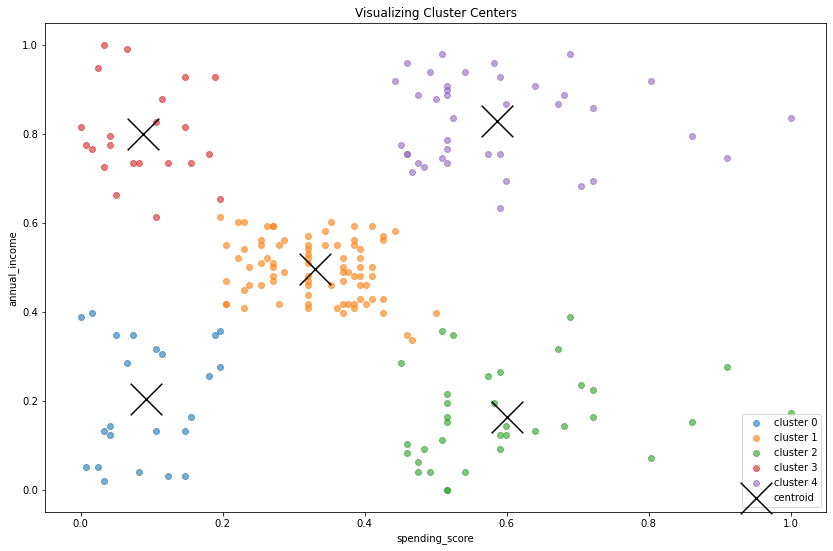

In [38]:
cluster(scaled_mall, 'spending_score', 'annual_income', 5)

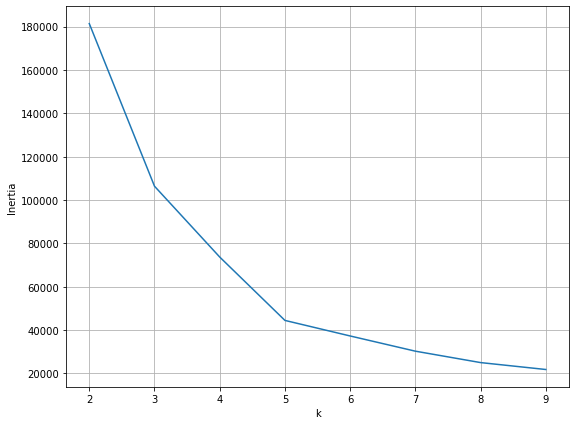

In [41]:
inertia(mall,'annual_income', 'spending_score', 2, 10)

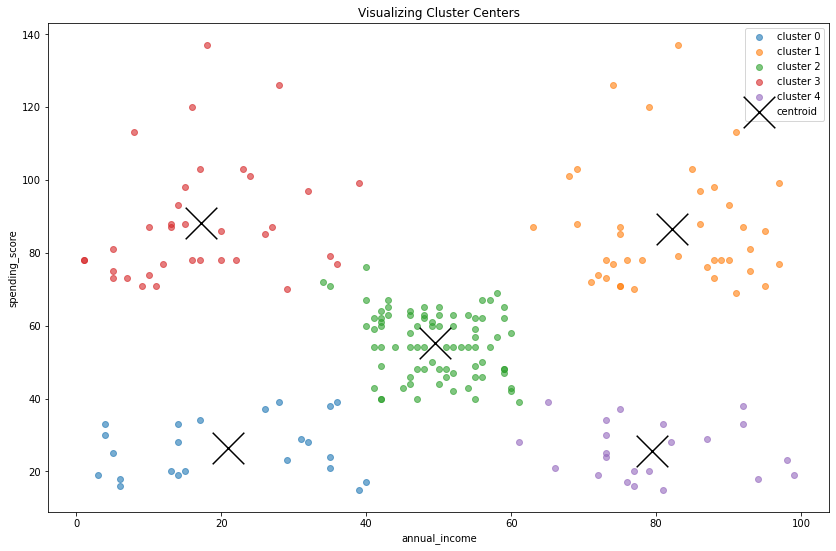

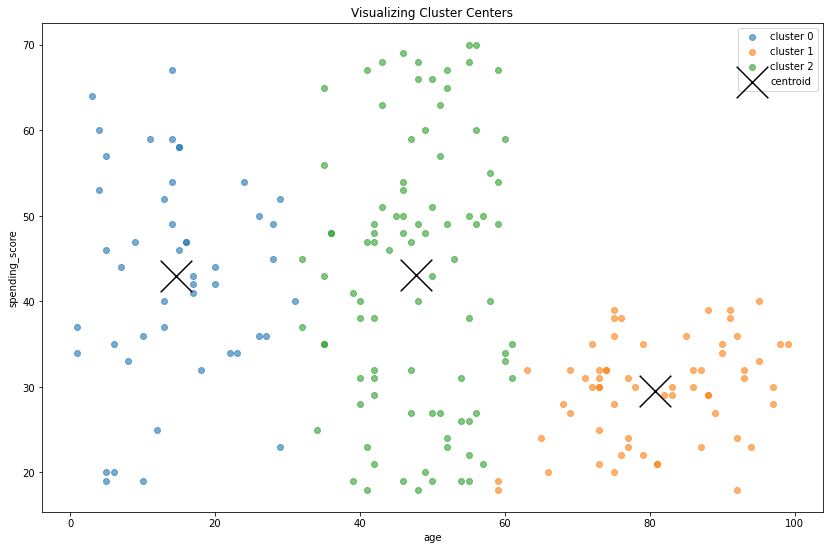

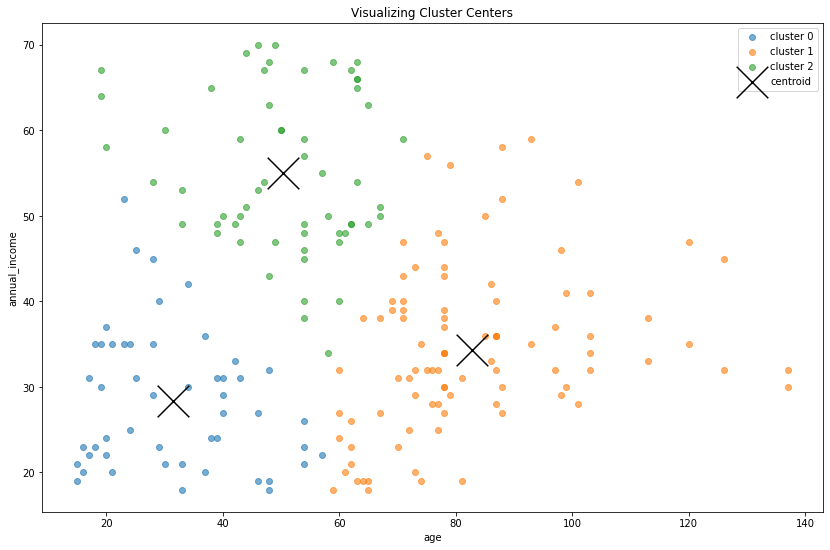

In [52]:
cluster(mall, 'annual_income', 'spending_score', 5)
cluster(mall, 'age', 'spending_score', 3)
cluster(mall, 'age', 'annual_income', 3)


